In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sbj='005'
rec='03'
edf_loc= '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
Data = mne.io.read_raw_edf(edf_loc)
events, event_id=mne.events_from_annotations(Data)
epochs=mne.Epochs(Data, events, event_id, tmin=0, tmax=4, baseline=(None,None))

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S005/S005R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [3]:
onset = []
duration = [4.1*3]*14
description = []

for i in range(len(events)-1):
    if events[i, 2] == 1:
        continue
    elif events[i, 2] == 2:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        #duration.append(events[i+1][0]-events[i-1][0])
        description.append('T1')
        continue
    elif events[i, 2] == 3:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        #duration.append(events[i+1][0]-events[i-1][0])
        description.append('T2')
        continue

0
1312
2624
3936
5248
6560
7872
9184
10496
11808
13120
14432
15744
17056


In [4]:
montage = mne.channels.make_standard_montage('standard_1020')
Data.rename_channels(lambda x: x.strip('.'))

<RawEDF | S005R03.edf, 64 x 19680 (123.0 s), ~129 kB, data not loaded>

In [5]:
ch_map = {'Fc5': 'FC5',
          'Fc3': 'FC3',
          'Fc1': 'FC1',
          'Fcz': 'FCz',
          'Fc2': 'FC2',
          'Fc4': 'FC4',
          'Fc6': 'FC6',
          'Cp5': 'CP5',
          'Cp3': 'CP3',
          'Cp1': 'CP1',
          'Cpz': 'CPz',
          'Cp2': 'CP2',
          'Cp4': 'CP4',
          'Cp6': 'CP6',
          'Af7': 'AF7',
          'Af3': 'AF3',
          'Afz': 'AFz',
          'Af4': 'AF4',
          'Af8': 'AF8',
          'Ft7': 'FT7',
          'Ft8': 'FT8',
          'Tp7': 'TP7',
          'Tp8': 'TP8',
          'Po7': 'PO7',
          'Po3': 'PO3',
          'Poz': 'POz',
          'Po4': 'PO4',
          'Po8': 'PO8'}

In [6]:
Data.rename_channels(ch_map)

<RawEDF | S005R03.edf, 64 x 19680 (123.0 s), ~129 kB, data not loaded>

In [7]:
Data.set_montage(montage)

<RawEDF | S005R03.edf, 64 x 19680 (123.0 s), ~178 kB, data not loaded>

In [8]:
#include ={'Fp1','Fpz', 'Fp2','FC1','FCz','FC2','C1','Cz','C2','CP1','CPz','CP2'}
include ={'Fp1', 'Fp2','AF3','AF4','AF7','AF8',
          'FC1','FC2','FC3','FC4','FC5','FC6',
          'C1','C2','C3','C4','C5','C6',
          'CP1','CP2','CP3','CP4','CP5','CP6'}

In [9]:
picks=mne.pick_channels(Data.ch_names, include, ordered=True)

In [10]:
print(onset)
print(np.array(onset)/160)
print(np.array(duration))

[0, 1312, 2624, 3936, 5248, 6560, 7872, 9184, 10496, 11808, 13120, 14432, 15744, 17056]
[  0.    8.2  16.4  24.6  32.8  41.   49.2  57.4  65.6  73.8  82.   90.2
  98.4 106.6]
[12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3]


In [11]:
onset = np.array(onset)/160
duration = np.array(duration)/160
my_ann = mne.Annotations(onset, duration, description)
print(my_ann)

<Annotations | 14 segments: T1 (7), T2 (7)>


In [12]:
Data.set_annotations(my_ann)

<RawEDF | S005R03.edf, 64 x 19680 (123.0 s), ~178 kB, data not loaded>

In [13]:
events, event_id=mne.events_from_annotations(Data)
#epochs=mne.Epochs(Data, events, event_id=event_id, tmin=0, tmax=12, baseline=(None,None))
epochs=mne.Epochs(Data, events, event_id=event_id, tmin=0, tmax=12, picks=picks, baseline=(None,None))

Used Annotations descriptions: ['T1', 'T2']
14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [14]:
epochs.info

<Info | 8 non-empty values
 bads: []
 ch_names: C2, CP5, AF3, AF7, CP6, AF4, C6, Fp2, CP2, FC6, CP1, CP3, C3, ...
 chs: 24 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 24
 projs: []
 sfreq: 160.0 Hz
>

In [108]:
T1=epochs['T1']
T2=epochs['T2']

In [189]:
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet, AverageTFR)

In [187]:
freqs = np.arange(2., 40., 2.)
vmin, vmax = -5., 5.  # Define our color limits.
channel=8
channel=channel-1

Loading data for 7 events and 1921 original time points ...


<ipython-input-185-c597763e3a1b>:5: RuntimeWarning: The input signal is shorter (1921) than "n_fft" (2048). Applying zero padding.
  power = tfr_stockwell(T1,  fmax=fmax, width=width)


Applying baseline correction (mode: mean)
Loading data for 7 events and 1921 original time points ...


<ipython-input-185-c597763e3a1b>:5: RuntimeWarning: The input signal is shorter (1921) than "n_fft" (2048). Applying zero padding.
  power = tfr_stockwell(T1,  fmax=fmax, width=width)


Applying baseline correction (mode: mean)
Loading data for 7 events and 1921 original time points ...


<ipython-input-185-c597763e3a1b>:5: RuntimeWarning: The input signal is shorter (1921) than "n_fft" (2048). Applying zero padding.
  power = tfr_stockwell(T1,  fmax=fmax, width=width)


Applying baseline correction (mode: mean)


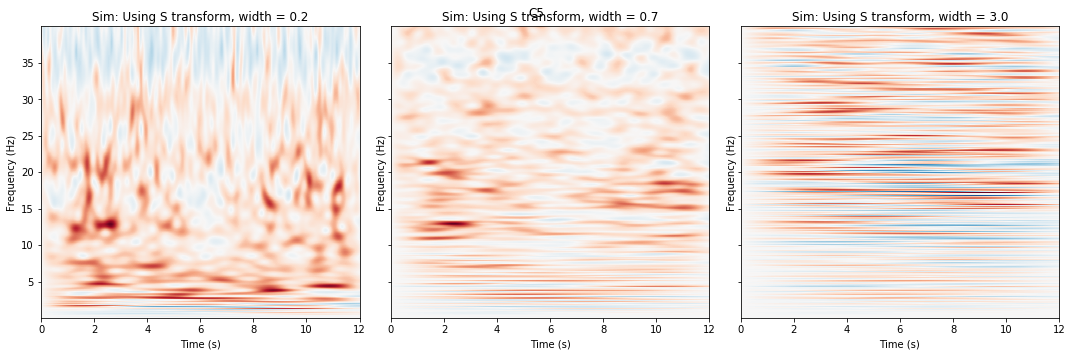

In [185]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#fmin, fmax = freqs[[0, -1]]
fmax=40
for width, ax in zip((0.2, .7, 3.0), axs):
    power = tfr_stockwell(T1,  fmax=fmax, width=width)
    power.plot([channel], baseline=(0., 0.), mode='mean', axes=ax, show=False,
               colorbar=False)
    ax.set_title('Sim: Using S transform, width = {:0.1f}'.format(width))
plt.tight_layout()

Loading data for 7 events and 1921 original time points ...


<ipython-input-186-1a297cbc4de5>:5: RuntimeWarning: The input signal is shorter (1921) than "n_fft" (2048). Applying zero padding.
  power = tfr_stockwell(T2,  fmax=fmax, width=width)


Applying baseline correction (mode: mean)
Loading data for 7 events and 1921 original time points ...


<ipython-input-186-1a297cbc4de5>:5: RuntimeWarning: The input signal is shorter (1921) than "n_fft" (2048). Applying zero padding.
  power = tfr_stockwell(T2,  fmax=fmax, width=width)


Applying baseline correction (mode: mean)
Loading data for 7 events and 1921 original time points ...


<ipython-input-186-1a297cbc4de5>:5: RuntimeWarning: The input signal is shorter (1921) than "n_fft" (2048). Applying zero padding.
  power = tfr_stockwell(T2,  fmax=fmax, width=width)


Applying baseline correction (mode: mean)


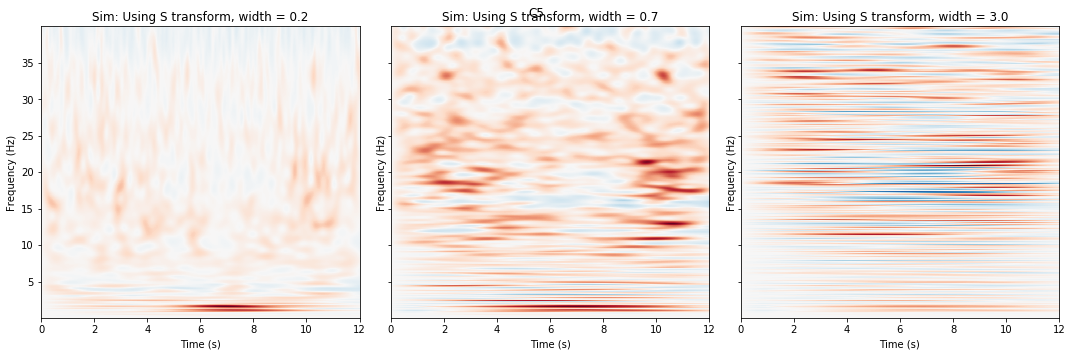

In [186]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#fmin, fmax = freqs[[0, -1]]
fmax=40
for width, ax in zip((0.2, .7, 3.0), axs):
    power = tfr_stockwell(T2,  fmax=fmax, width=width)
    power.plot([channel], baseline=(0., 0.), mode='mean', axes=ax, show=False,
               colorbar=False)
    ax.set_title('Sim: Using S transform, width = {:0.1f}'.format(width))
plt.tight_layout()

In [217]:

con, freqs, times, _, _ = mne.connectivity.spectral_connectivity(
    epochs, indices=1,
    method='wpli2_debiased', mode='cwt_morlet', sfreq=160,
    cwt_freqs=cwt_freqs, cwt_n_cycles=cwt_n_cycles, n_jobs=1)
layout = mne.find_layout(epochs.info, 'eeg')  # use full layout

tfr = AverageTFR(epochs.info, T1.get_data(), freqs, len(epochs))
tfr.plot_topo(fig_facecolor='w', font_color='k', border='k')

NameError: name 'cwt_freqs' is not defined

ValueError: setting an array element with a sequence.

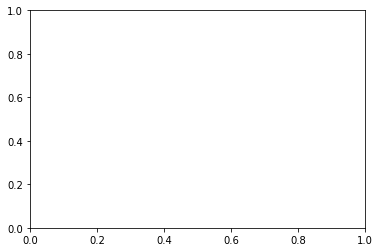

In [210]:
plt.plot(T1[1])

import networkx as nx

epochs.ch_names

info = Data.info
fmin=4
fmax=12
how_many=10


for i in range(3):
    if i==0:
        continue
        
    T=epochs['T'+str(i)]
    print(T)
    plv, freqs, times, n_epochs, n_tapers=mne.connectivity.spectral_connectivity(T,method='plv', indices=None, mode='cwt_morlet', sfreq=info['sfreq'], fmin=fmin, fmax=fmax, faverage=True, cwt_freqs=np.linspace(fmin,fmax,how_many), cwt_n_cycles=1, n_jobs=1)
    if i==1:
        plv_T1=plv
    if i==2:
        plv_T2=plv
    

len(plv)

G_T1=nx.Graph()
G=G_T1

#t=5*160
centrality=[]
for t in range(len(plv_T1[1,1,0,:])):
    min_plv=0.2
    max_plv=0.95
    adj=plv_T1[:,:,0,t]
    G.clear()
    G.add_nodes_from(epochs.ch_names)
    pos=nx.circular_layout(G)
    for i in range(len(epochs.ch_names)-1):
        for j in range(i):
            if (adj[i,j]<=min_plv or adj[i,j]>=max_plv):
                continue
            w_edges= [(epochs.ch_names[i],epochs.ch_names[j],1-adj[i,j])]
            G.add_weighted_edges_from(w_edges)
    
    H=nx.minimum_spanning_tree(G, weight=1)
    centrality.append(nx.eigenvector_centrality(H).values())
    
lst_T1=[]
for t in centrality:
    lst_T1.append(list(t))

plt.imshow(np.transpose(lst_T1), aspect='auto')

len(picks)

#t=5*160
centrality=[]
for t in range(len(plv_T2[1,1,0,:])):
    min_plv=0.2
    max_plv=0.95
    adj=plv_T2[:,:,0,t]
    G.clear()
    G.add_nodes_from(epochs.ch_names)
    pos=nx.circular_layout(G)
    for i in range(len(epochs.ch_names)-1):
        for j in range(i):
            if (adj[i,j]<=min_plv or adj[i,j]>=max_plv):
                continue
            w_edges= [(epochs.ch_names[i],epochs.ch_names[j],1-adj[i,j])]
            G.add_weighted_edges_from(w_edges)
    del H
    H=nx.minimum_spanning_tree(G, weight=1)
    centrality.append(nx.eigenvector_centrality(H).values())
    
lst_T2=[]
for t in centrality:
    lst_T2.append(list(t))
    
plt.imshow(np.transpose(lst_T1), aspect='auto')


plt.imshow(np.transpose(np.array(lst_T1)-np.array(lst_T2)), aspect='auto')

#### computing minimum spanning tree ###Use graph H as minimum spanning tree
H=nx.minimum_spanning_tree(G, weight=1)
print(sorted(H.edges(data=True)))
nx.draw(H,pos, with_labels=True)

(H.edges)


for values in G.nodes:
    evc.append(centrality[values])


H=nx.minimum_spanning_tree(G, weight=1)
print(sorted(H.edges(data=True)))
nx.draw(H,pos, with_labels=True)

pos=nx.spring_layout(G)
plt.figure(figsize=(100,100))
nx.draw_networkx_edges(G,pos,alpha=0.3,width=3, edge_color='m')
nodesize=10
nx.draw_networkx_nodes(G,pos,node_size=nodesize,node_color='w',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
nx.draw_networkx_labels(G,pos,fontsize=14)